# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [22]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print ("Dataset has {} rows, {} columns".format(*data.shape))
print (data.head())  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: We will acquire tranform matrices for both PCA and ICA that will map the original dimension of data to a new coordinate that captures the variance in ascending order for PCA and mutually independent space for ICA.
The first dimension of the PCA will capture the highest variation in the data. Based on the read.md file, the highest variation is in the fresh products; thus I would expect the highest contribution from fresh product and the contribution from other features proportional to their variance. 
ICA generates independent components thus I would expect mutually exculusive compoenents for ICA output. It will tranform the data into independent features that contruct the actual observation. Each ICA components will represent one property of the collected data that is not covered by other components. These will be hidden factors that lie behind the original observation set. For instance, ICA does assume that fresh feature is composed of combination of 6 different hidden features with certain weights, and the same hidden features also contruct the milk feature with different weights in their combination

###PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print("PCA Components:")
print (pca.components_)
print("PCA Explained Variance:")
print (pca.explained_variance_ratio_)

PCA Components:
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
PCA Explained Variance:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer:  Variance is high for the first two compoenents and it does drop immediately after. I would use the first two dimension after PCA that captures approximately 96% of the power. The 86% comes from the sum of variances for the first and second PCA components as 0.46+0.40=0.86.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Each dimension represents linear combination of the features in the new vector space where new features are orthogonal to each other. They capture the variance of the original data in ascending order. Based on their value, I can say that feature-1 (fresh products) is the most representative of the variance, while combination of feature-2 and 3 (milk and grocery) comes after. 

Even though it is not required, if I have to use a single feature from original data space, I would use Fresh feature since its weight in the first PCA vector ( which is [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471] )is the highest. I know there is no requirement for such a selection, but I can interpret this notion from the results. I know that PCA transforms the original feature set to a new set which is combination of all original feature elements, but it weights each original factor with different value, and if a relative weight of an original feature is considerably higher than another, one can say that this feature captures more variance. 
For an extreme case, you can consider a PCA vector with [1 0 0 0 0 0] with sigma value of 0.5. This means that the very first feature of the original data set does capture the 50% of the variance of the system.

The main advantage of PCA transformation is the reduction in dimentionality. With the first two PCA vectors we can tranform the original data into smaller dimension while keeping the most of the original variance. This will reduce the effect of "curse of dimentionality" and also overfitting of the data. For instance, if we use the first two vectors for the PCA transform, then the transformed data will have only 2 dimension instead of 6. This will reduce the complexity of the clustering or classification algorithm that is used afterwards. 

###ICA

In [24]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=data.shape[1],whiten=True)
data_ica = data - np.mean(data,axis=0)
data_ica /=  np.std(data_ica,axis=0)
print(data_ica[0:10])
print(np.mean(data_ica,axis=0))
ica.fit(data_ica)

# Print the independent components
print("ICA Components:")
print ("{}".format(ica.components_.T))
print("ICA Mixing Matrix:")
print ("{}".format(ica.mixing_))

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569     -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407      0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232      2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588      0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918      1.299347
5 -0.204806  0.334067 -0.297637 -0.496155         -0.228138     -0.026224
6  0.009950 -0.352316 -0.102849 -0.534512          0.054280     -0.347854
7 -0.349981 -0.113981  0.155359 -0.289315          0.092286      0.369601
8 -0.477901 -0.291409 -0.185336 -0.545854         -0.244726     -0.275079
9 -0.474497  0.718495  1.151423 -0.394488          0.954031      0.203461
Fresh              -4.895074e-17
Milk               -1.110223e-17
Grocery            -6.181924e-17
Frozen              1.211152e-17
Detergents_Paper    1.236385e-17
Delicatessen       -9

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: Components matrix shows the unmixing matrix that can be used to map each feature to independent dimension, while ica.mixing shows the mixing matrix of these features and these two are inverse of each other. 

Corresponding unmixing weights of the first hidden feature are  [-0.00193608  0.01093135  0.00488068 -0.00381119  0.05022495 -0.00267403], it looks like contribution of the feature-4(Detergant) dominates the unmixing operation. Thus, it is likely to be an independent feature by itself. 

Corresponding unmixing weights of the second hidden feature are [-0.07259357  0.00103292  0.00161823  0.01687991 -0.00631957  0.01399257], this one is dominated by component-0 and 3 and 5 (fresh , grocer and delicatessen). component-3 and 5 have the same sign; so it looks like their contribution to this independent component are at the same direction while component-0 has opposite sign. Component-0 has the highest value and hence it is dominant in this transform.

Corresponding unmixing weights of the third hidden feature are [0.05509711 -0.00735165  0.00571428  0.11490338 -0.0058304  -0.06024154] , the contribution of component0, component3 and component5 dominates this tranform and the signs of compoenent 0 and 3 are same while compoenent-5 is opposite. 

Corresponding unmixing weights of the fourth hidden feature are [0.00176924 -0.05404891  0.00253163 -0.0070804  -0.00328919 -0.00204365] , the contribution of component1 domites this tranform. Thus, it is likely to be an independent feature by itself.  

These compoenents are used to transform data into independent components that represent hidden features. We can matrix multiply the original data with the compoenent matrix and achieve independent features. This becomes usefull to identify the latent features that may contruct the observed results. 

Different combinations of the hidden/latent featues construct the observable set. For instance, fresh, milk, grocery can be decomposed into solid, expensive, resuable, flammable etc. (feature which construct the observations but independent) and the component matrix map the obsevation set to the new independent feature set.

We can remove the multicollinearity from data by mapping an observation to this new independent feature set where each feature will provide a distinct/independent information from data. 


##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: For small K value, K-means runs fast compared to hierarchical clustering, but as dimension increases it sees the effect of curse of dimentionality and its computational cost increases. GMM is typically fast algorithm but it may see singularity problem. 

Gaussian mixture model assumes that the underlying features have Gaussian behaviour, which may or may not be true. In our case, it is not easy to make such assumption about the data. I have plot the histograms of reduced data set for below and saw that the distribution does not fit a Gaussian very well (I have plot the reduced set since we will apply Kmeans or GMM on to the reduced data set). On the other hand, Kmeans is more general which can be applied to both Gaussian and non-Gaussian behaving data; thus I have picked Kmeans. (I have also piece of code below that looks at GMM).

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [14]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


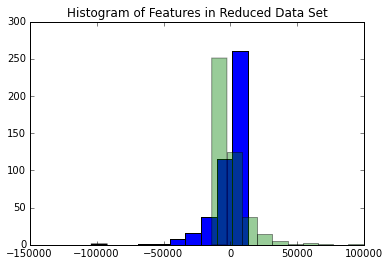

In [15]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data_full = pca.transform(data)
reduced_data = reduced_data_full[:,0:2]
print (reduced_data[:10])  # print upto 10 elements
plt.hist(reduced_data[:,0])
plt.hist(reduced_data[:,1],alpha=0.4)
plt.title("Histogram of Features in Reduced Data Set")
plt.show()

In [16]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

isKmeans= True

if (isKmeans==True):
    clusters = KMeans(n_clusters=3)
    clusters.fit(reduced_data)
    print (clusters)
else:
    clusters = GMM(n_components=3, covariance_type='full')
    clusters.fit(reduced_data)
    print (clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


In [17]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

[[-24220.71188261  -4364.45560022]
 [  4114.95375632  -3081.03219608]
 [  1339.44615464  25546.49074629]]
   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669   9656     7561     214              2674          1338
1   7057   9810     9568    1762              3293          1776
2   6353   8808     7684    2405              3516          7844
3  13265   1196     4221    6404               507          1788
4  22615   5410     7198    3915              1777          5185
5   9413   8259     5126     666              1795          1451
6  12126   3199     6975     480              3140           545
7   7579   4956     9426    1669              3321          2566
8   5963   3648     6192     425              1716           750
9   6006  11093    18881    1159              7425          2098 [1 1 1 1 0 1 1 1 1 2]


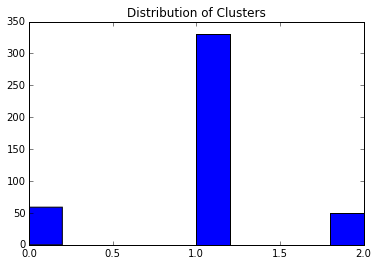

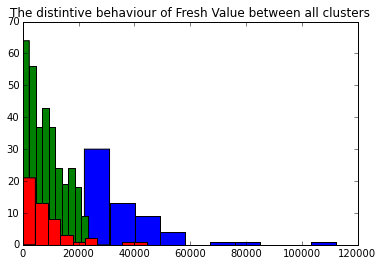

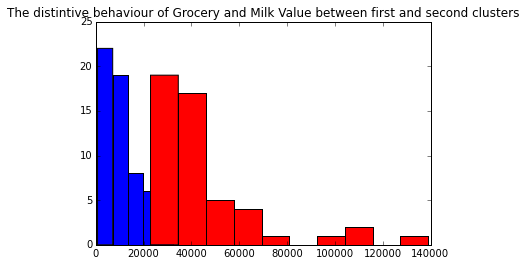

In [19]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

if (isKmeans==True):
    centroids = clusters.cluster_centers_
    print (centroids)
    print(data[0:10] ,clusters.labels_[0:10])
    
    plt.hist(clusters.labels_)
    plt.title('Distribution of Clusters')
    plt.show()
    
    cluster_0 = data[clusters.labels_==0]
    cluster_1 = data[clusters.labels_==1]
    cluster_2 = data[clusters.labels_==2]
    plt.hist(cluster_0['Fresh'].values)
    plt.hist(cluster_1['Fresh'].values)
    plt.hist(cluster_2['Fresh'].values)
    plt.title('The distintive behaviour of Fresh Value between all clusters')
    plt.show()
    plt.hist(cluster_0['Grocery'].values+cluster_0['Milk'].values)
    plt.hist(cluster_2['Grocery'].values+cluster_2['Milk'].values,color='r')
    plt.title('The distintive behaviour of Grocery and Milk Value between first and second clusters')

    plt.show()
else:
    centroids = clusters.means_
    print (centroids)

C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


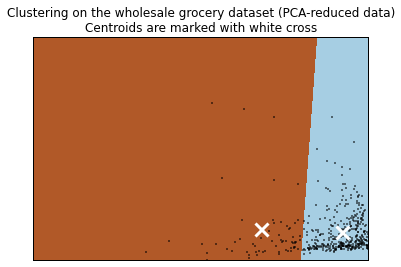

C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


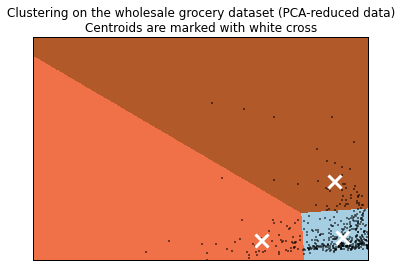

C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


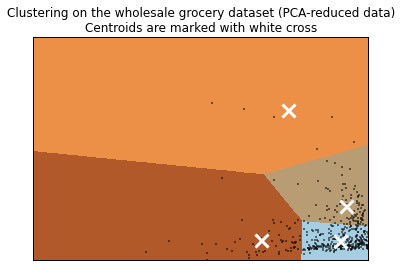

C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


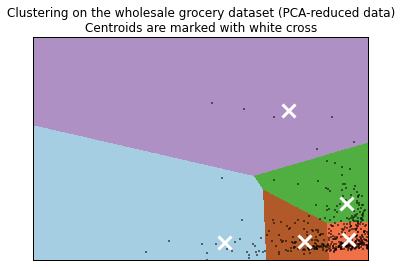

C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\yemre\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


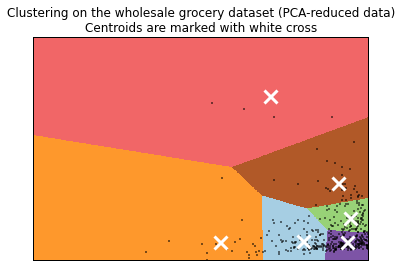

In [20]:
# Put the result into a color plot
for n_cls  in range(2,7):
    if (isKmeans==True):
        clusters = KMeans(n_clusters=n_cls)
        clusters.fit(reduced_data)
        print (clusters)
        centroids = clusters.cluster_centers_
        Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
        
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
        plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
                  'Centroids are marked with white cross')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
    else:
        clusters = GMM(n_components=n_cls, covariance_type='full')
        clusters.fit(reduced_data)
        print (clusters)
        centroids = clusters.means_
        Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
        plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
                  'Centroids are marked with white cross')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.show()


**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Each central points represents the characteristics of one set of customers. For this study, the characteristics of each customer means their annual shopping behaviour. For instance, centroid one represents the customers that has certain behaviour of purchase values. Based on the first level analysis, the most distintive factors will be fresh products, milk and grocery. These are highligted in the figure at histogram plots

I have used 3 clusters based on my observation of the visualization of the data. It looks like two clusters  case is not able capture the change in one of the dimensions very well as illustrated in the figure above. In the four dimension case, I have not seen a very valuable change from third cluster case and given that increasing the number of clusters too much may end up causing overfitting, I have stopped at 3 clusters.

After PCA transform, my expectation is one dimension represents the variation in fresh product and other represents variation in grocery and milk. So, the customers that spends more money on fresh will be in one cluster while those who spend less will be in another (This is illustrated with Histograms). Similarly, the variation in grocery and milk will cause customers to fall into one cluster or another. 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: As asked by the question itself, I have used PCA. I have tried Kmeans algorithm with PCA using only two features in reduced data. It is not easy to interpret the PCA transformed data. One of the reason that I have picked PCA over ICA is that I was trying to capture the variance in original data with smaller number of features. Hence, this is more appropriate for PCA since it uses coveriance of the data to capture the variance in different dimensions. In addition, the main goal of ICA is to change the dimensionality to achieve independent components rather than reducing the dimensionality to capture more variance. 


**9)** How would you use that technique to help the company design new experiments?

Answer: We can split each group into half and use a single policy change on one group and no change to another. We apply this testing for certain duration and then look at their responses. Which group response shows a better gain (either keeping the policy or changing it), we apply that policy to all the members of that group (cluster). This is basically A/B testing of the policy.   
As we have more policy change proposal, we randomly divide each cluster into half and apply the above scheme to see the response and move forward accordinly based on the success of the policy.

**10)** How would you use that data to help you predict future customer needs?

Answer: We can train an SVM classifier using this dataset and its cluster groups as the target values and use this parametric model (SVM) when we see a new customer to determine which cluster it falls into. For any specific policy we apply to the cluster set, we apply it to the new customer. 